# Lab1: data analysis and visualization Python

### Purpose : get basic knowledge of using Python for analysis and visualization  data

In [1]:
# find variant for Olga Tsyban
N = ord("O") % 3 + 1
print(f"Variant: {N}")

Variant: 2


> #### First step download csv file "russia_losses_equipment.csv" from
> #### link : https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

In [2]:
# all imports
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
# Create a function to read a column from a CSV file

def read_column_from_csv(file_name, column_name):
    with open(file_name, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)  
        col_index = header.index(column_name) 
        column_data = [float(row[col_index]) for row in reader if row[col_index]]
    return np.array(column_data)


In [5]:
# Create a numpy array from the "tank" column
file_name = 'russia_losses_equipment.csv'
column_name = 'tank'
tank_losses = read_column_from_csv(file_name, column_name)

In [6]:
# print np array tank_losses
print(tank_losses)

[8636. 8632. 8631. 8624. 8618. 8611. 8601. 8592. 8582. 8574. 8571. 8568.
 8563. 8551. 8547. 8542. 8533. 8529. 8522. 8518. 8513. 8508. 8501. 8496.
 8484. 8476. 8455. 8450. 8447. 8441. 8434. 8431. 8429. 8421. 8417. 8411.
 8406. 8402. 8399. 8390. 8381. 8356. 8344. 8331. 8320. 8313. 8302. 8288.
 8284. 8266. 8257. 8250. 8245. 8238. 8227. 8214. 8206. 8199. 8191. 8182.
 8180. 8178. 8171. 8155. 8153. 8142. 8132. 8123. 8107. 8099. 8080. 8073.
 8066. 8042. 8039. 8035. 8031. 8019. 8009. 8001. 7987. 7984. 7974. 7958.
 7956. 7956. 7936. 7928. 7911. 7902. 7879. 7869. 7843. 7834. 7828. 7806.
 7794. 7779. 7765. 7740. 7728. 7710. 7700. 7692. 7671. 7662. 7650. 7635.
 7622. 7611. 7605. 7590. 7576. 7560. 7547. 7529. 7510. 7496. 7485. 7454.
 7449. 7434. 7429. 7418. 7405. 7380. 7375. 7366. 7354. 7332. 7312. 7307.
 7285. 7279. 7268. 7262. 7255. 7242. 7241. 7236. 7229. 7213. 7205. 7196.
 7193. 7189. 7180. 7174. 7169. 7146. 7137. 7132. 7110. 7087. 7074. 7057.
 7033. 7018. 7009. 6998. 6986. 6966. 6951. 6922. 69

In [7]:
# calculate daily tank loses
# input parameter(tank_losses) is numpy array

def daily_losses(tank_losses):
    return np.diff(tank_losses)

In [12]:
result_daily_losses = daily_losses(tank_losses)
print(result_daily_losses)

[ -4.  -1.  -7.  -6.  -7. -10.  -9. -10.  -8.  -3.  -3.  -5. -12.  -4.
  -5.  -9.  -4.  -7.  -4.  -5.  -5.  -7.  -5. -12.  -8. -21.  -5.  -3.
  -6.  -7.  -3.  -2.  -8.  -4.  -6.  -5.  -4.  -3.  -9.  -9. -25. -12.
 -13. -11.  -7. -11. -14.  -4. -18.  -9.  -7.  -5.  -7. -11. -13.  -8.
  -7.  -8.  -9.  -2.  -2.  -7. -16.  -2. -11. -10.  -9. -16.  -8. -19.
  -7.  -7. -24.  -3.  -4.  -4. -12. -10.  -8. -14.  -3. -10. -16.  -2.
   0. -20.  -8. -17.  -9. -23. -10. -26.  -9.  -6. -22. -12. -15. -14.
 -25. -12. -18. -10.  -8. -21.  -9. -12. -15. -13. -11.  -6. -15. -14.
 -16. -13. -18. -19. -14. -11. -31.  -5. -15.  -5. -11. -13. -25.  -5.
  -9. -12. -22. -20.  -5. -22.  -6. -11.  -6.  -7. -13.  -1.  -5.  -7.
 -16.  -8.  -9.  -3.  -4.  -9.  -6.  -5. -23.  -9.  -5. -22. -23. -13.
 -17. -24. -15.  -9. -11. -12. -20. -15. -29.  -8. -10. -11.  -6. -11.
 -24. -12.  -8.  -4.  -9. -10. -19. -11. -21.  -1.  -5.  -5.  -8.  -8.
 -19.  -6. -11. -17. -21.  -9.  -8. -16. -14. -17. -23. -14.  -1. -13.
  -8. 

In [69]:
# function to normalize output after <def daily losses()>

def normalize_daily_losses(daily_losses):
    result = daily_losses * (-1)
    return np.where(result == -0.0, 0.0, result)

In [72]:
#result_daily_losses = result_daily_losses * (-1)

# Normalize -0 to 0
#result_daily_losses = np.where(result_daily_losses == -0.0, 0.0, result_daily_losses)

result_daily_losses = normalize_daily_losses(result_daily_losses)
print(result_daily_losses)

print(f"\nresult 0 element: {result_daily_losses[0]}")

[ 4.  1.  7.  6.  7. 10.  9. 10.  8.  3.  3.  5. 12.  4.  5.  9.  4.  7.
  4.  5.  5.  7.  5. 12.  8. 21.  5.  3.  6.  7.  3.  2.  8.  4.  6.  5.
  4.  3.  9.  9. 25. 12. 13. 11.  7. 11. 14.  4. 18.  9.  7.  5.  7. 11.
 13.  8.  7.  8.  9.  2.  2.  7. 16.  2. 11. 10.  9. 16.  8. 19.  7.  7.
 24.  3.  4.  4. 12. 10.  8. 14.  3. 10. 16.  2.  0. 20.  8. 17.  9. 23.
 10. 26.  9.  6. 22. 12. 15. 14. 25. 12. 18. 10.  8. 21.  9. 12. 15. 13.
 11.  6. 15. 14. 16. 13. 18. 19. 14. 11. 31.  5. 15.  5. 11. 13. 25.  5.
  9. 12. 22. 20.  5. 22.  6. 11.  6.  7. 13.  1.  5.  7. 16.  8.  9.  3.
  4.  9.  6.  5. 23.  9.  5. 22. 23. 13. 17. 24. 15.  9. 11. 12. 20. 15.
 29.  8. 10. 11.  6. 11. 24. 12.  8.  4.  9. 10. 19. 11. 21.  1.  5.  5.
  8.  8. 19.  6. 11. 17. 21.  9.  8. 16. 14. 17. 23. 14.  1. 13.  8.  8.
  3.  7. 13.  5. 11. 11. 11. 23.  9.  9.  8. 10. 12.  9.  2. 11.  7. 17.
  5.  2. 10.  9. 12. 10. 10. 10.  9.  6.  8. 30. 13. 22. 11. 10.  4. 20.
 21. 13. 24. 14. 10.  5. 10. 12.  2.  5.  9.  4.  7

In [71]:
# found 4 highst tank loses
# daily_losses:numpy.array

def largest_losses(daily_losses, top_n=4):
    return np.sort(daily_losses)[-top_n:][::-1]

In [67]:
print(largest_losses(result_daily_losses, top_n=4))

[66. 55. 48. 44.]


In [25]:
# find tank destroyed in spring 2023
#def losses_in_spring(file_name):
   # df = pd.read_csv(file_name, parse_dates=['date'])
   # spring_2023 = df[(df['date'] >= '2023-03-01') & (df['date'] <= '2023-05-31')]
   # return spring_2023['tank'].sum()


In [ ]:
#print(losses_in_spring(file_name))

In [73]:
# find tank destroyed in spring 2023 (better approach,with Pandas)
def losses_in_spring2023(file_name):
    df = pd.read_csv(file_name, parse_dates=['date'])
    spring_2023 = df[(df['date'] >= '2023-03-01') & (df['date'] <= '2023-05-31')]
    data = daily_losses(spring_2023['tank'])
    #data_res = np.sort(data)
    data = normalize_daily_losses(data)
    return data.sum()

# call function to see the result
losses_in_spring2023(file_name)

407.0

In [96]:
# find tank destroyed in spring 2023 (better approach,with NumPY)
# Use genfromtxt but add the 'invalid_raise=False' parameter to avoid errors on mismatched rows
# Check if the column exists and return its values   
def read_column_from_csv(file_name, column_name):
    data = np.genfromtxt(file_name, delimiter=',', dtype=None, encoding='utf-8', names=True, invalid_raise=False)
    if column_name in data.dtype.names:
        return data[column_name]
    else:
        raise ValueError(f"Column '{column_name}' not found in the CSV file.")

        
# Read the date and tank losses columns from the CSV file
# Conversion of 'date' column to NumPy datetime64 format
def losses_in_spring(file_name, column_one, column_two):
    dates = read_column_from_csv(file_name, column_one)
    tank_losses = read_column_from_csv(file_name, column_two).astype(float)
    
    date_parsed = np.array(dates, dtype='datetime64[D]')
    start_date = np.datetime64('2023-03-01')
    end_date = np.datetime64('2023-05-31')

    spring_filter = (date_parsed >= start_date) & (date_parsed <= end_date)
    spring_tank_losses = tank_losses[spring_filter]
    
    daily_tank = daily_losses(spring_tank_losses)
    tank = normalize_daily_losses(daily_tank)
    return np.sum(tank)

In [97]:
total_losses = losses_in_spring(file_name, 'date', 'tank')
print(total_losses)

407.0


/var/folders/0q/vd8vp_qd01bd8sd6_z13gjq80000gn/T/ipykernel_96779/1631350916.py:5: ConversionWarning: Some errors were detected !
    Line #617 (got 20 columns instead of 19)
    Line #624 (got 20 columns instead of 19)
    Line #626 (got 20 columns instead of 19)
    Line #653 (got 20 columns instead of 19)
    Line #656 (got 20 columns instead of 19)
    Line #657 (got 20 columns instead of 19)
    Line #664 (got 20 columns instead of 19)
    Line #673 (got 20 columns instead of 19)
    Line #700 (got 20 columns instead of 19)
    Line #703 (got 20 columns instead of 19)
    Line #705 (got 20 columns instead of 19)
    Line #780 (got 20 columns instead of 19)
    Line #811 (got 20 columns instead of 19)
    Line #815 (got 20 columns instead of 19)
    Line #845 (got 20 columns instead of 19)
    Line #846 (got 20 columns instead of 19)
    Line #853 (got 20 columns instead of 19)
    Line #860 (got 20 columns instead of 19)
  data = np.genfromtxt(file_name, delimiter=',', dtype=None, 

In [36]:
# Average tank losses for the last 100 days
#def avg_last_100_days_general(tank_losses):
 #   return np.mean(tank_losses[-100:])

In [ ]:
#print(avg_last_100_days_general(tank_losses))

In [33]:
# Average tank losses for the las 100 (better approach with Pandas)

def avg_last_100_days(file_name):
    df = pd.read_csv(file_name, parse_dates=['date'])
    # Sort the DataFrame by 'date' to get the last 100 days
    df = df.sort_values(by='date')
    # Filter the last 100 days
    last_100_days = df.tail(100)
    # Calculate daily tank losses for the last 100 days
    data = daily_losses(last_100_days['tank'])
    return np.mean(data)

avg_last_100_days(file_name)

9.05050505050505

In [100]:
# Average tank losses for the las 100 (better approach NumPY)
# Here i use converting 'date' column to NumPy datetime64 format
def avg_last_100_days(file_name, date_column, tank_column):
    dates = read_column_from_csv(file_name, date_column)
    tank_losses = read_column_from_csv(file_name, tank_column).astype(float)
    
    date_parsed = np.array(dates, dtype='datetime64[D]')
    
    # Sort the data by 'date'
    sorted_indices = np.argsort(date_parsed)
    sorted_dates = date_parsed[sorted_indices]
    sorted_tank_losses = tank_losses[sorted_indices]
    
    if len(sorted_dates) > 100:
        last_100_days_indices = slice(-100, None)
    else:
        last_100_days_indices = slice(None)
    
    last_100_dates = sorted_dates[last_100_days_indices]
    last_100_tank_losses = sorted_tank_losses[last_100_days_indices]
    
    data = daily_losses(last_100_tank_losses)
    return np.mean(data)

# call function to get a result
avg_last_100_days(file_name, 'date', 'tank')

/var/folders/0q/vd8vp_qd01bd8sd6_z13gjq80000gn/T/ipykernel_96779/1631350916.py:5: ConversionWarning: Some errors were detected !
    Line #617 (got 20 columns instead of 19)
    Line #624 (got 20 columns instead of 19)
    Line #626 (got 20 columns instead of 19)
    Line #653 (got 20 columns instead of 19)
    Line #656 (got 20 columns instead of 19)
    Line #657 (got 20 columns instead of 19)
    Line #664 (got 20 columns instead of 19)
    Line #673 (got 20 columns instead of 19)
    Line #700 (got 20 columns instead of 19)
    Line #703 (got 20 columns instead of 19)
    Line #705 (got 20 columns instead of 19)
    Line #780 (got 20 columns instead of 19)
    Line #811 (got 20 columns instead of 19)
    Line #815 (got 20 columns instead of 19)
    Line #845 (got 20 columns instead of 19)
    Line #846 (got 20 columns instead of 19)
    Line #853 (got 20 columns instead of 19)
    Line #860 (got 20 columns instead of 19)
  data = np.genfromtxt(file_name, delimiter=',', dtype=None, 

9.05050505050505

In [41]:
# Plot tank losses for the last year
def plot_tank_losses(file_name):
    df = pd.read_csv(file_name, parse_dates=['date'])
    last_year = df[df['date'] >= df['date'].max() - pd.DateOffset(years=1)]
    
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(last_year['date'], last_year['tank'], linestyle='--', color='purple', label='Daily Losses')
    
    # Customizations
    plt.grid(True, which='both', axis='both', color='gray', linestyle=':', linewidth=0.5)
    plt.title('Tank Losses in the Last Year (2023-2024)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Tank Losses', fontsize=12)
    plt.legend()
    
    # Save the plot
    plt.savefig('tank_losses.png')
    plt.show()

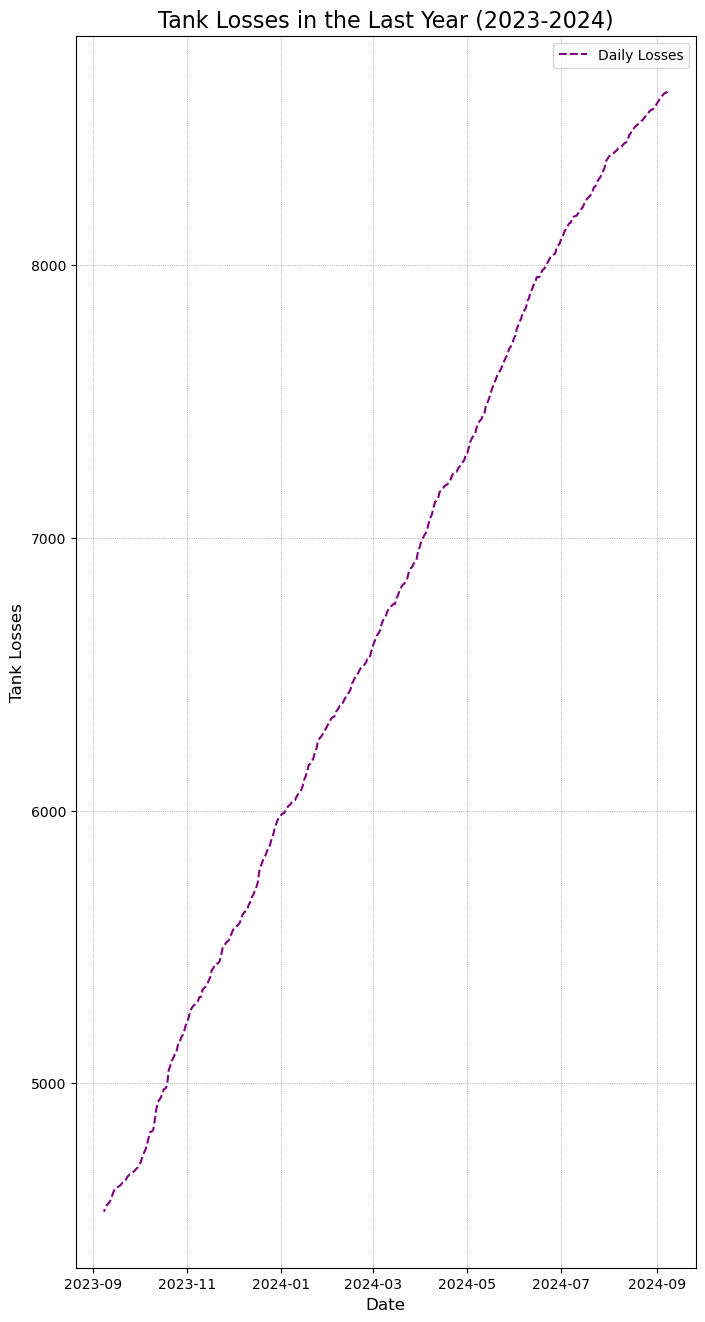

In [42]:
plot_tank_losses(file_name)

## Link to GitHub: [Lab1](https://github.com/OlgaTsuban/Python_university)

## Link to Nbviever: [Lab1](https://nbviewer.org/github/OlgaTsuban/Python_university/blob/main/Python_lab1_Tsyban_Olga/Python_lab1_TsybanOlga_KN222A.ipynb)